
> Modestas Cepulis T00199237 AI dataset project file.



> I'm using a kaggle dataset 'Stroke prediction':
[Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)



> In this project, I will try to demonstrate which machine learning algorithm is the best at predicting a certain end value. (In this case which algorithm predicts 'stroke' value the best)

## Final conclusion is written at the end of this document.





---





# INTRODUCTION: Finding out information about the dataset:



In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
train_dataset_url = "https://raw.githubusercontent.com/ModestasCepulis/RobsProjectPart3/main/healthcare-dataset-stroke-data.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /root/.keras/datasets/healthcare-dataset-stroke-data.csv


In [3]:
df = pd.read_csv(train_dataset_url)

In [4]:
df.head(1000)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60211,Male,1.40,0,0,No,children,Urban,90.51,18.9,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
997,61715,Male,55.00,0,0,Yes,Private,Rural,56.42,31.8,never smoked,0
998,37830,Female,29.00,0,0,No,Private,Urban,73.67,21.0,Unknown,0


dealing with missing values:

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# A really fantsatic and intelligent way to deal with blanks, from Thoman Konstantin in: https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

Now we need to check to make sure if all the null values are gone:

In [7]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


Once we have the data, now we need to look at the stroke values for each gender.
1 being there was a stroke and 0 being there stroke didnt happen

In [8]:
groupfilter = df.groupby(['gender'])
AllTheStates = groupfilter['stroke'].count()
print(AllTheStates)

gender
Female    2994
Male      2115
Other        1
Name: stroke, dtype: int64


In [9]:
allStrokeData = groupfilter['stroke'].value_counts()
allStrokeData

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

In [10]:
totalAmountOfStates = allStrokeData[1] + allStrokeData[3]
print("Total Amount Of States: ")
print(totalAmountOfStates)

Total Amount Of States: 
249


In [11]:
totalStrokesFemale = allStrokeData[1]
totalStrokesMale = allStrokeData[3]
totalStrokeOther = allStrokeData[4]
totalStrokeCount = totalAmountOfStates

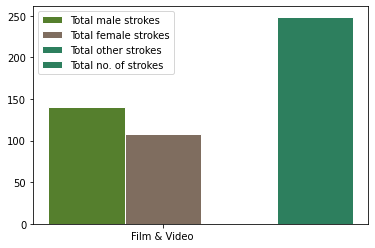

In [12]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [totalStrokesFemale]
bars2 = [totalStrokesMale]
bars3 = [totalStrokeOther]
bars4 = [totalStrokeCount]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#557f2d', width=barWidth, edgecolor='white', label='Total male strokes')
plt.bar(r2, bars2, color='#7f6d5f', width=barWidth, edgecolor='white', label='Total female strokes')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Total other strokes')
plt.bar(r4, bars4, color='#2d7f5e', width=barWidth, edgecolor='white', label='Total no. of strokes')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))], ['Film & Video', 'Music', 'Publishing'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

from the barchart we can see that "males" are usually more likely to get a stroke

this shows the probablity of each value for a stroke to occur

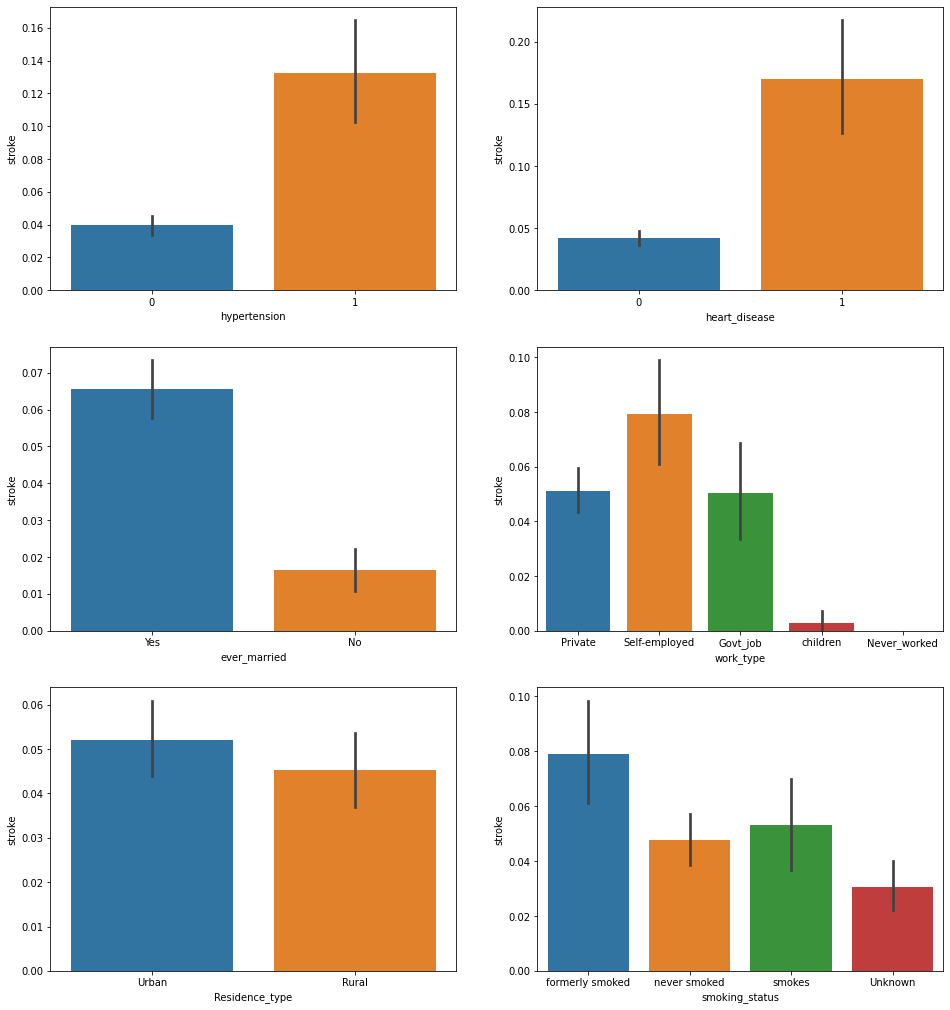

In [13]:
fig=plt.figure(figsize=(16, 24))

for index, column in enumerate(list(df.columns.drop(['stroke', 'id', 'age', 'gender', 'avg_glucose_level', 'bmi']).values)):
    fig.add_subplot(4, 2, index + 1)
    plots = sns.barplot(data=df, y="stroke",palette="tab10", x=column)

plt.show()

# FINDINGS OF INTRODUCTION:

From the data, we can see that people that are more likely to haves strokes are:



*   Males
*   Self Employed
*   People that have high blood pressure
*   People that have/had heart diseases
*   That live in Urban areas
*   Former Smokers
*   Married people







From the data, we can see that people that are less likely to haves strokes are:



*   Females
*   People that never worked
*   People that normal blood pressure
*   People that never had (no) heart diseases
*   That live in Rural areas
*   People that never Smoked
*   People that are not married







Now we can look at the data correlation between the stroke, bmi, avg_glucose levels and age

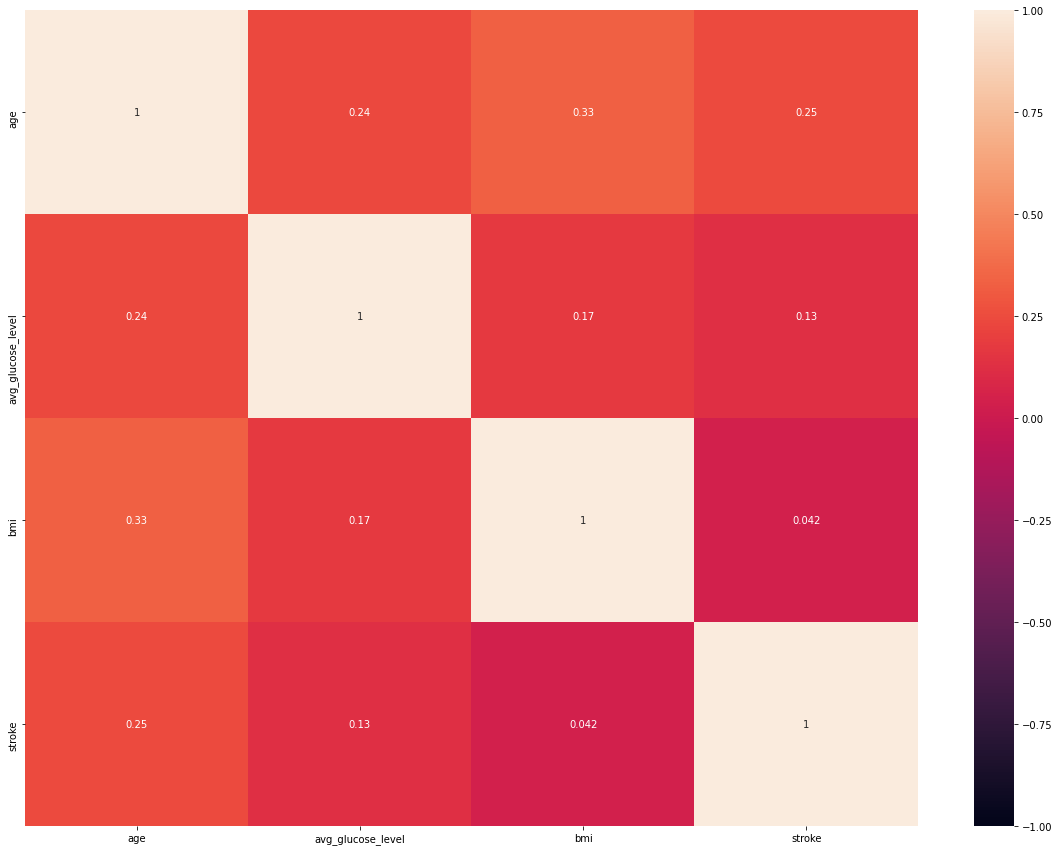

In [14]:
corr = pd.DataFrame(df.drop(['id', 'heart_disease', 'hypertension'], axis = 1).corr())

plt.figure(figsize=(20,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

# PART ONE, TRYING OUT DIFFERENT MACHINE LEARNING ALGORITHMS AND COMPARING THEM:

this tells us that people with 'higher' (older people) age values are more likely to get a stroke

by knowing that gender and age have a big role of resulting in a stroke, we can try to train this data by using a machine learning decision tree for data training

Decision tree machine learning could try to predict the values for example if a person would have a stroke or not, based on the values provided by the dataset.

In the end, the model could hopefully predict a stroke scenario

In [15]:
df.head(5000)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5964,Female,59.0,0,0,Yes,Private,Urban,182.52,30.100000,Unknown,0
4996,6976,Female,40.0,0,0,Yes,Private,Urban,93.97,23.600000,never smoked,0
4997,11145,Female,8.0,0,0,No,children,Urban,104.03,18.400000,Unknown,0
4998,39229,Female,24.0,0,0,Yes,Private,Rural,67.99,32.100000,never smoked,0


first we need to separate the two values of gender and age into a seperate dataset

In [16]:
#X = df.drop(columns=['id','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status', 'stroke'])
X = df.drop(columns=['id','avg_glucose_level','bmi','stroke'])
#X = df.drop(columns=['id','stroke'])
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,formerly smoked


in order to work with a decistion tree algorithm, we need to replace the gender from males and females to float variables.



*   Males = 0
*   Females = 1



In [17]:
groupfilter = X.groupby(['smoking_status'])
AllWorkTypes = groupfilter['smoking_status'].count()
print(AllWorkTypes)

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: smoking_status, dtype: int64


In [18]:
groupfilter = X.groupby(['work_type'])
AllWorkTypes = groupfilter['work_type'].count()
print(AllWorkTypes)

work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
Name: work_type, dtype: int64


In [19]:
groupfilter = X.groupby(['Residence_type'])
AllWorkTypes = groupfilter['Residence_type'].count()
print(AllWorkTypes)

Residence_type
Rural    2514
Urban    2596
Name: Residence_type, dtype: int64


In order to work with decision trees we need to convert all of the string values to different in values as follows:


In [20]:
X["gender"].replace({"Male": 0, "Female": 1, "Other":2}, inplace=True)

X["ever_married"].replace({"No": 0, "Yes": 1}, inplace=True)

#Work_Type:: Never_worked = 0, private = 1, Govt_job = 2, self-employed = 3, children = 4
X["work_type"].replace({"Never_worked": 0, "Private": 1, "Govt_job":2, "Self-employed":3, "children":4}, inplace=True)

#Smoking_status:: never smoked = 0, smokes = 1, formerly smoked = 2, unknown = 3
X["smoking_status"].replace({"never smoked": 0, "smokes": 1, "formerly smoked":2, "Unknown":3}, inplace=True)

X["Residence_type"].replace({"Urban": 0, "Rural": 1}, inplace=True)


X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,0,67.0,0,1,1,1,0,2
1,1,61.0,0,0,1,3,1,0
2,0,80.0,0,1,1,1,1,0
3,1,49.0,0,0,1,1,0,1
4,1,79.0,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,0,0
5106,1,81.0,0,0,1,3,0,0
5107,1,35.0,0,0,1,3,1,0
5108,0,51.0,0,0,1,1,1,2


in order to work with a decistion tree algorithm, we need to replace the stroke value from an integer to a string value


*   0 = No (For no stroke happened)
*   1 = Yes (For stroke occured)



now we need to get the 'final value' or the prediction which in this case is a stroke (1 or 0)

In [21]:
Y = df['stroke'] 
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

in order to work with a decistion ree algorithm, we need to replace the stroke value from an integer to a string value


*   0 = No (For no stroke happened)
*   1 = Yes (For stroke occured)



In [22]:
Y.replace({0: "No", 1: "Yes"}, inplace=True)
Y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105     No
5106     No
5107     No
5108     No
5109     No
Name: stroke, Length: 5110, dtype: object

In [23]:
model = DecisionTreeClassifier()
model.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

to make a prediction, lets look at an already existing value for a certain gender and age and the stroke outcome and try to run a prediction based on the reference:

In [24]:
X.head(5000)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,0,67.0,0,1,1,1,0,2
1,1,61.0,0,0,1,3,1,0
2,0,80.0,0,1,1,1,1,0
3,1,49.0,0,0,1,1,0,1
4,1,79.0,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...
4995,1,59.0,0,0,1,1,0,3
4996,1,40.0,0,0,1,1,0,0
4997,1,8.0,0,0,0,4,0,3
4998,1,24.0,0,0,1,1,1,0


In [25]:
Y.head(5000)

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
4995     No
4996     No
4997     No
4998     No
4999     No
Name: stroke, Length: 5000, dtype: object

In [26]:
#gender:: 0 for male, 1 for female, 2 for unknown

#hypertension, heart_disease:: 0 = no, 1 = yes

#work_type:: Never_worked = 0, private = 1, Govt_job = 2, self-employed = 3, children = 4

#residence_Type:: urban = 0, rural = 1

#Smoking_status:: never smoked = 0, smokes = 1, formerly smoked = 2, unknown = 3


#gender	age	hypertension	heart_disease, ever_married, work type, residence type, glucose_level, bmi, smoking status

#total number of inputs: 8
first = [1, 62, 0, 0, 1, 3, 1, 0] # a random set of values (??)
second = [0, 67, 0, 1, 1, 1, 0, 2] # a value that exists in the database (yes stroke)
third = [0, 59, 1, 0, 1, 0, 1, 1] # a random set of values (??)
fourth = [1, 59, 0, 0, 1, 1, 0, 3] # a value that exists in the database (no stroke)
fifth = [0, 80, 1, 0, 1, 0, 1, 1] # a random set of values (??)
model.predict([first, second, third, fourth, fifth])

array(['No', 'Yes', 'No', 'No', 'Yes'], dtype=object)

it seems that this prediction model only works when it directly corresponds with the values that are in the database.

Lets try to test out our hipothesis, where we know that:

From the data, we can see that people that are more likely to haves strokes are:



*   Males
*   Self Employed
*   People that have high blood pressure
*   People that have/had heart diseases
*   That live in Urban areas
*   Former Smokers
*   Married people

Lets try out multiple data with different age groups:


In [27]:
X.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,0,67.0,0,1,1,1,0,2
1,1,61.0,0,0,1,3,1,0
2,0,80.0,0,1,1,1,1,0


In [28]:
#total number of inputs: 8
# all males(0), different age groups, hypertension and heart_disease to 1, ever married 1,
# work type: self_employed(3), residence_type urban(0), smoking status either smoking(1) or previously smoked(2)

first = [0, 75, 1, 1, 1, 3, 0, 1] 
second = [0, 62, 1, 1, 1, 3, 0, 2] 
third = [0, 85, 1, 1, 1, 3, 0, 1] 

#differnet values:
fourth = [0, 68, 1, 0, 1, 3, 1, 1] 
model.predict([first, second, third, fourth])

array(['No', 'No', 'No', 'Yes'], dtype=object)

It seems that the model only predicts the correct stroke values if the data that was used already exists in the dataset

To test this theory out, we need to do a way to calcuate the accuracy of the model:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

score = accuracy_score(Y_test, predictions)
score

0.9151989562948467

In [30]:
Y_test

4070     No
4353     No
1226     No
154     Yes
2429     No
       ... 
1052     No
4237     No
486      No
4187     No
1103     No
Name: stroke, Length: 1533, dtype: object

Although the accuracy of predictions seems to be at a good value, the predicitons are mostly wrong

In conclusion for decision tree: Decision tree machine learning algorithm is probably not the best way ofp predicting values. Although the prediction 'score' is quite high, most of the time the devision tree algorithm does not predict the actual stroke values.

It might be because of the dataset or the algorithms.

# PART2: TRYING OUT CONFUSION MATRIXES TO FULLY UNDERSTAND WHERE THINGS WENT WRONG, DATASET OR ALGORITHMS:

**PART 2: Confusion Matrix**
Another way of testing the model is to try and do it through working with confusion matrix. Were going to be using confusion matrix to evaluate performance of the model that we used before.

The confusion matrix will predict the actual values to the ones that are predicted by the model.

first we display the confusion matrix values:

In [31]:
confusion_matrix(Y_test, predictions)

array([[1400,   55],
       [  75,    3]])

This is a 2D version of a confusion matrix, to make it more readable we can transfer it to a better understandable graph:

<function matplotlib.pyplot.show>

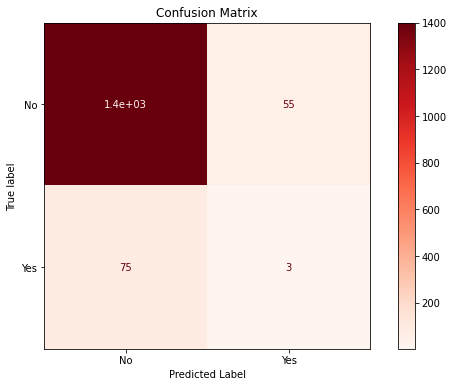

In [32]:
matrix = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show

This just shows how many values are getting predicted correctly.

seems that we're not getting good predictions as the all seem to be concentrating to all the values being 'No'.

Lets try to use KNeighborsClassifier as a model now (hopefully were going to get some better prediction results):

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train, Y_train)
knn_predictions = knn_clf.predict(X_test)
print('Accuracy of the knn algorithm is: {}'.format(accuracy_score(Y_test, knn_predictions)))

Accuracy of the knn algorithm is: 0.9504240052185258


it seems that the accuracy is the same or similar to the model that we used before.

In [34]:
confusion_matrix(Y_test, knn_predictions)

array([[1457,    0],
       [  76,    0]])

confusion matrixes with knn_predictions values seems kinda similar, not much is changed, but we have to make it into a graph just to make sure.

<function matplotlib.pyplot.show>

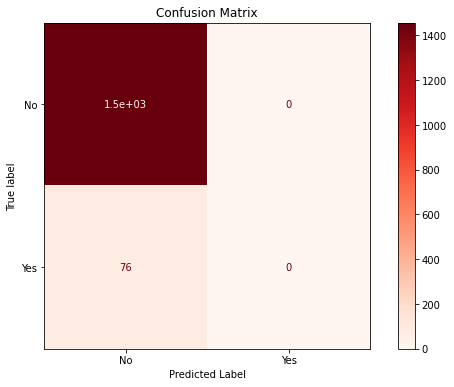

In [35]:
matrix = plot_confusion_matrix(knn_clf, X_test, Y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show

Not really a big different of trying to see the confusion matrix with KNeighborsClassifier

For the confusion matrix, 1469 of (no) stroke values were predicted correct when compared to the actua values, when 61 values were not predicted correctly.

Same goes for (yes) stroke prediction, 1 value was predicted correctly, when 2 values were not predicted correctly

In conclusion, both decision tree or KNeighborsClassifier models are not really best or suitable to use for predictions for this particular stroke dataset.

Lets ry to get a classification_report and see each value:

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
confusion_matrix(Y_test, Y_train)

array([[2311,  124],
       [ 115,    5]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_train))

              precision    recall  f1-score   support

          No       0.95      0.95      0.95      2435
         Yes       0.04      0.04      0.04       120

    accuracy                           0.91      2555
   macro avg       0.50      0.50      0.50      2555
weighted avg       0.91      0.91      0.91      2555



In [38]:
Y.replace({"No": 0, "Yes": 1}, inplace=True)
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

Our 'precision' and 'recall' predictions are not great

In [39]:
from sklearn.metrics import precision_recall_curve

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
precision, recall, thresholds = precision_recall_curve(Y_test, Y_train)

In [40]:
precision

array([0.04696673, 0.0620155 , 1.        ])

In [41]:
recall

array([1.        , 0.06666667, 0.        ])

In [42]:
thresholds

array([0, 1])

These values arent great, something else is needed to be done

# PART 3, USING MORE COLUMNS AND ADDING MORE VALUES TO THE DATASET (CHANGING THEM) WITH 'SMOTE'

Lets try to include BMI and glucose levels into the X (dataset) value:

In [43]:
X = df.drop(columns=['id','stroke'])
X["gender"].replace({"Male": 0, "Female": 1, "Other":2}, inplace=True)

X["ever_married"].replace({"No": 0, "Yes": 1}, inplace=True)

#Work_Type:: Never_worked = 0, private = 1, Govt_job = 2, self-employed = 3, children = 4
X["work_type"].replace({"Never_worked": 0, "Private": 1, "Govt_job":2, "Self-employed":3, "children":4}, inplace=True)

#Smoking_status:: never smoked = 0, smokes = 1, formerly smoked = 2, unknown = 3
X["smoking_status"].replace({"never smoked": 0, "smokes": 1, "formerly smoked":2, "Unknown":3}, inplace=True)

X["Residence_type"].replace({"Urban": 0, "Rural": 1}, inplace=True)
y = df['stroke']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [45]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
confusion_matrix(y_test, predictions)

array([[3246,  158],
       [ 154,   19]])

were still getting similar values but it seems that theyre a bit better.

<function matplotlib.pyplot.show>

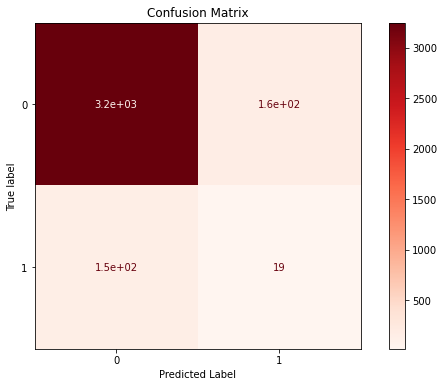

In [46]:
matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show

Now lets try to use 'Random Forest Model' and see if we get any different results

In [47]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
modelRfPredictions = model_rf.predict(X_test)

lets check the prediction score and confusion matrix if anything majorly has changed:

In [48]:
score_rf = accuracy_score(y_test, modelRfPredictions)
score_rf

0.9505171931786414

it really seems that the score is similar.

In [49]:
y_test.head(5000)

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
284     0
686     0
703     0
3341    0
2353    0
Name: stroke, Length: 3577, dtype: int64

**CONCLUSION:**

It seems that these different type of models have the same or similar accuracy score. This could mean that the data is either biased or there is something wrong with it and it cannot be used for prediction any sort of outcome accurately.

We can try to use 'SMOTE' to try and make the data from the dataset less biased.
(It helps to increase the stroke values to = 1

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
X_res, y_res = smote.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Once we added more data with 'SMOTE' we can compare the values that we had to the new ones that we have now:

In [52]:
from collections import Counter
X_res, y_res = smote.fit_resample(X, y)
print('Original dataset has %s' % Counter(y))
print('Resampled dataset has %s' % Counter(y_res))
print("\n")

Original dataset has Counter({0: 4861, 1: 249})
Resampled dataset has Counter({1: 4861, 0: 4861})




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


seems like the data is a bit better, and its looks like its more 50/50 of data for a stroke that happened and stroke that didnt (0 and 1)

Now were going to be training our data to a model again, but this time with a more balanced data:

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [54]:
model_balanced = DecisionTreeClassifier()
model_balanced.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
predictions_balanced = model_balanced.predict(X_test)

In [56]:
predictions_balanced

array([0, 1, 0, ..., 0, 0, 1])

The predictions seems a bit better than before.

In [57]:
score_balanced = accuracy_score(y_test, predictions_balanced)
score

0.9151989562948467

The score seems to be similar to before.

Lets try to do the same predictions as before and see what is happening and if anything has changed.

In [58]:
X.head(500)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,1,0,228.69,36.600000,2
1,1,61.0,0,0,1,3,1,202.21,29.879487,0
2,0,80.0,0,1,1,1,1,105.92,32.500000,0
3,1,49.0,0,0,1,1,0,171.23,34.400000,1
4,1,79.0,1,0,1,3,1,174.12,24.000000,0
...,...,...,...,...,...,...,...,...,...,...
495,1,71.0,0,0,1,1,0,93.28,34.700000,0
496,0,5.0,0,0,0,4,1,122.19,35.000000,3
497,1,14.0,0,0,0,4,1,129.53,21.300000,0
498,1,15.0,0,0,0,4,1,114.53,29.100000,3


In [59]:
y.head(500)

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: stroke, Length: 500, dtype: int64

In [60]:
first = [0, 67, 0, 1, 1, 3, 0, 228, 36, 2] 
second = [0, 62, 1, 1, 1, 3, 0, 250, 45, 2] 
third = [0, 67, 0, 1, 1, 3, 0, 228, 36, 2] 

#differnet values:
fourth = [0, 68, 1, 0, 1, 3, 1, 200, 75, 1] 
model_balanced.predict([first, second, third, fourth])

array([1, 0, 1, 0])

seems that the values are a bit better.

Now we need to test out the confusion matrix bit:

In [61]:
confusion_matrix(y_test, predictions_balanced)

array([[1359,   98],
       [  82, 1378]])

As we can see now the predictions/actual values are more balanced in the confusion matrix:

Now we can plot it just to make sure

<function matplotlib.pyplot.show>

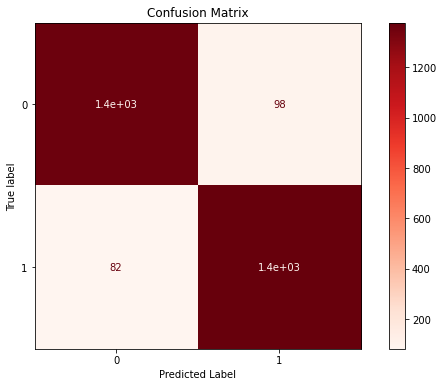

In [62]:
matrix = plot_confusion_matrix(model_balanced, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show

From this graph we can see that our data is way better when it was 'cleaned' with 'SMOTE'

Lets try and see with RandomForest algorithm and with KMean algorithm:

In [63]:

knn_clf_balanced = KNeighborsClassifier(n_neighbors=9)
knn_clf_balanced.fit(X_train, y_train)
knn_predictions_balanced = knn_clf_balanced.predict(X_test)
print('Accuracy of the knn algorithm is: {}'.format(accuracy_score(y_test, knn_predictions_balanced)))

Accuracy of the knn algorithm is: 0.8765855330819335


as we can see the accuracy score while using KNeighborsClassifer is a bit lower.

In [64]:
confusion_matrix(y_test, knn_predictions_balanced)

array([[1121,  336],
       [  24, 1436]])

<function matplotlib.pyplot.show>

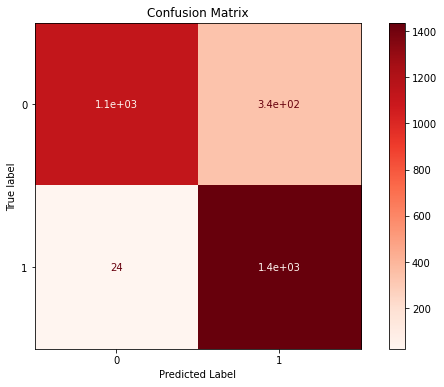

In [65]:
matrix = plot_confusion_matrix(knn_clf_balanced, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show

as we can see that the KNeighbours algorithm is not as good in predicting correct values as a decision tree algorithm.

Lets try the last algorithm, the random forest algorithm.

In [66]:
model_rf_balanced = RandomForestClassifier()
model_rf_balanced.fit(X_train, y_train)
modelRfPredictions = model_rf_balanced.predict(X_test)

In [67]:
score_balanced_forest = accuracy_score(y_test, modelRfPredictions)
score

0.9151989562948467

The accuracy score is similar.

In [68]:
confusion_matrix(y_test, modelRfPredictions)

array([[1443,   14],
       [  77, 1383]])

<function matplotlib.pyplot.show>

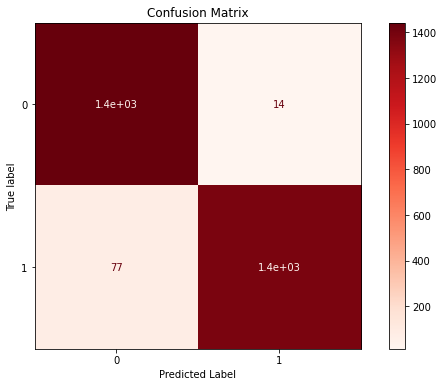

In [69]:
matrix = plot_confusion_matrix(model_rf_balanced, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show

As we can see that this random forest algorithm is very similar in accuracy to the decision tree algorithm. (The forest algorithm is slighty better in getter the right prediction/actual values).

# FINAL CONCLUSION AND FINDINGS:
#### As it seems from the first few tries, the dataset wasnt properly working with the different used algorithms.

#### After some testing was done, a conclusion was made that something is wrong with the dataset (it was biased or unbalanced)

#### The dataset was refractured by using 'SMOTE' to balance out the data. Once the data was balanced out (more stroke values were set to 1 because there was alot of 0 stroke values) the algorithms seemed to be starting to work in a better way.

#### The algorithms started to predict the correct values for the dataset. Three different algorithms were tested out by getting the prediction accuracy score and by using confusion matrixes: Decision tree, Random Forest and KNeighbourMeans.

#### Out of all of them, the Random Forest algorithm was the worst at predicting the correct values, when the other two were quite similar to each other.

#### Findings were that if a particular machine learning algorithm does not work on a dataset, it might be that the dataset needs to be refactured.

#### For the best prediction results, different models/machine learning algorithms need to be used.